In [1]:
import tweepy
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
orig_working_directory = os.getcwd()
print(orig_working_directory)

/Users/trevordoucet/gwu-arl-data-pt-03-2020-u-c/01-Class-Activities/Tue-Thurs-Class/07-Social-Analytics/2/Activities/01-Evr_Tweepy_Intro/Solved


In [3]:
os.chdir(os.path.join('..','..','..','..','..','..','..'))

In [4]:
curr_working_directory = os.getcwd()
os.getcwd()

'/Users/trevordoucet/gwu-arl-data-pt-03-2020-u-c'

In [5]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [15]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [16]:
target_user = ["CNN", "CBSNews", "BBC", "Fox", "nytimes"]

In [17]:
public_tweets = api.user_timeline(user_account, tweet_mode='extended')

NameError: name 'user_account' is not defined

In [18]:
breakdown = []
for user in target_user:
    public_tweets = api.user_timeline(user, count=100)
    
    tweets = []
    times = []    
    
    for tweet in public_tweets:
        tweet_text = tweet["text"]
        timestamp = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
        tweets.append((tweet_text, timestamp))
        
    for tweet_text, timestamp in tweets:
        results = analyzer.polarity_scores(tweet_text)
        results["tweet"] = tweet_text
        results["time"] = timestamp
        results["source"] = user
        breakdown.append(results)

In [19]:
news_tweets = pd.DataFrame(breakdown)

In [20]:
nyt = news_tweets[news_tweets["source"]=="nytimes"]
fox = news_tweets[news_tweets["source"]=="Fox"]
bbc = news_tweets[news_tweets["source"]=="BBC"]
cbs = news_tweets[news_tweets["source"]=="CBSNews"]
cnn = news_tweets[news_tweets["source"]=="CNN"]

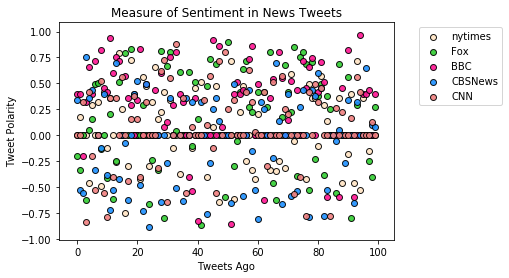

In [21]:
plt.scatter(x=range(len(cnn)), y=nyt["compound"], c="bisque", label="nytimes", edgecolors = 'k', alpha=.9)
plt.scatter(x=range(len(cbs)), y=fox["compound"], c="limegreen", label="Fox", edgecolors = 'k', alpha=.9)
plt.scatter(x=range(len(bbc)), y=bbc["compound"], c="deeppink", label="BBC", edgecolors = 'k', alpha=.9)
plt.scatter(x=range(len(fox)), y=cbs["compound"], c="dodgerblue", label="CBSNews", edgecolors = 'k', alpha=.9)
plt.scatter(x=range(len(nyt)), y=cnn["compound"], c="lightcoral", label="CNN", edgecolors = 'k', alpha=.9)


plt.title("Measure of Sentiment in News Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.legend(loc=9, bbox_to_anchor=(1.20, 1))

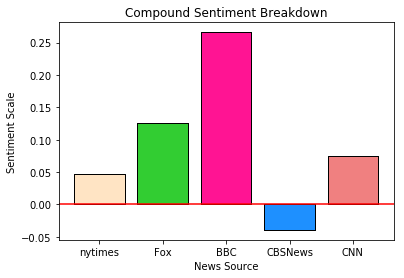

In [22]:
plt.bar(x=nyt["source"], height=nyt["compound"].mean(), color="bisque", label="nytimes", edgecolor="k")
plt.bar(x=fox["source"], height=fox["compound"].mean(), color="limegreen", label="Fox", edgecolor="k")
plt.bar(x=bbc["source"], height=bbc["compound"].mean(), color="deeppink", label="BBC", edgecolor="k")
plt.bar(x=cbs["source"], height=cbs["compound"].mean(), color="dodgerblue", label="CBSNews", edgecolor="k")
plt.bar(x=cnn["source"], height=cnn["compound"].mean(), color="lightcoral", label="CNN", edgecolor="k")


plt.title("Compound Sentiment Breakdown")
plt.xlabel("News Source")
plt.ylabel("Sentiment Scale")
plt.axhline(y=0, c="red")

**Observations: 
------------------
1. Over the past 100 tweets, BBC has had the most neutral stance in regards to tweet sentiment comparatively.
2. CNN and The New York times are about the same in regards to producing tweets with a negative tone. 
3. Examining the scatterplot, we can establish that CBS News has one of the lowest points recorded at somewhere between -.075 and -1.00 which indicates an outlier for a heavily negative tone on a tweet. 

In [14]:
news_tweets.to_csv("Test1.csv")